Automatically created module for IPython interactive environment
(428342, 2)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0.5, 0, 'Number of components')

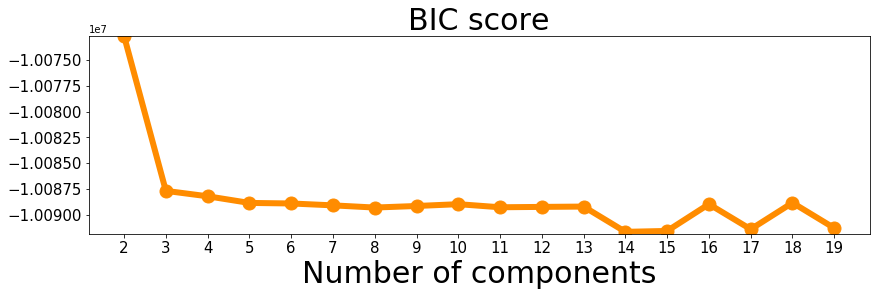

In [3]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

total_df = pd.read_csv("to_mrmr.csv")

# Generate random sample, two components
np.random.seed(0)
#C = np.array([[0., -0.1], [1.7, .4]])
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

df = total_df.dropna(axis=0)



normal = df[df['label']==0]
abnormal = df[df['label']==1]
feature = [#'flux',
           #'zero_month',
           #'zero_week',
           #'continuous_zero',
           #'diff_week_day',
           #'diff_month',
           #'std_week',
           #'diff_std',
           #'rec_day',
           'rec_week',
           #'rec_2week',
           #'rec_month',
           #'rec_day2',
           'rec_week2',
           #'rec_2week2',
           #'rec_month2',
          ]
X = normal.loc[:, feature].sample(frac=0.15)
#for i in range(10):
#  X = X.append(abnormal.loc[:, feature])
  
X = X.to_numpy()

print(X.shape)
lowest_bic = np.infty
bic = []
n_components_range = range(2, 20)
cv_types = ['full']#'diag','spherical', 'tied',
for cv_type in cv_types:
    for n_components in n_components_range:
        print(n_components)
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle([#'navy', 'turquoise', #'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(14, 8))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range)
    bars.append(plt.plot(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        lw=6, marker='o', ms=13, color=color))
plt.xticks(n_components_range, size=15)
plt.yticks(size=15)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score', size=30)
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
#plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components', size=30)
#spl.legend([b[0] for b in bars], cv_types)

(2855614, 24)
(978, 24)
training time (sec):  4.272960424423218
training time per sample (sec):  7.481681571961238e-06
reference time (sec): 2.724876880645752
reference time per sample (sec):  1.192261475519229e-06
크기 2285469
비정상 978
[ 11.25545634  10.25545634   8.57451154   8.34004496   8.14041329
   7.92438391   7.82815032   7.72508011   7.54251367   7.37668278
   7.3600074    7.22758412   7.09521167   7.02536655   7.01106117
   7.00396005   6.98665833   6.97955468   6.97555231   6.97371052
   6.93116352   6.93052003   6.90070653   6.88158655   6.88059421
   6.87780992   6.86728751   6.84505515   6.83954301   6.8308326
   6.82017386   6.80153441   6.79829725   6.79043421   6.76900831
   6.76809706   6.76627687   6.76412111   6.75247002   6.74659252
   6.74275376   6.73748799   6.73423069   6.73260707   6.7317574
   6.72695893   6.7263283    6.71435799   6.71062929   6.70625061
   6.69234279   6.68342743   6.68333407   6.68219966   6.67863698
   6.67456498   6.67437586   6.67165806   

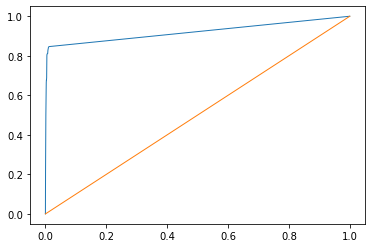

0.9208125587132909


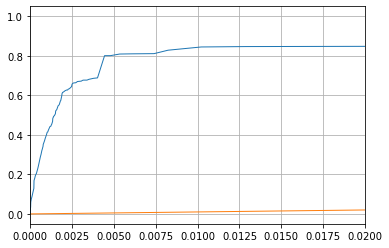

1%
fpr: 0.008235094819808877
tpr:  0.8282208588957055

810 2265678 18813 168
precision:  0.04127809203485706
recall:  0.8282208588957055
F-measure: 0.07863695032696584
MCC: 0.18381155342197059
0.5%
fpr: 0.004790126115620504
tpr:  0.8006134969325154

783 2273548 10943 195
precision:  0.06677468872590824
recall:  0.8006134969325154
F-measure: 0.12326824775330748
MCC: 0.23037502642361427
0.1%
fpr: 0.0009892794499956445
tpr:  0.4069529652351738

398 2282231 2260 580
precision:  0.14973664409330323
recall:  0.4069529652351738
F-measure: 0.21892185286356078
MCC: 0.24634233274817288


In [5]:
import itertools
import pandas as pd
import glob
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import scale
from sklearn import mixture
import time

total_df = pd.read_csv("to_mrmr.csv")



window_size = 2
normal_scores = []
feature = [
           'rec_week',
           'rec_week2',]


df = total_df.dropna(axis=0)

normal = df[df['label']==0]
abnormal = df[df['label']==1]

print(normal.shape)
print(abnormal.shape)

def kl_divergence(p, q):
  return np.sum(np.where(p != 0, p * np.log(p / (q+1e-8)+1e-8), 0), axis=-1)


gmm = mixture.GaussianMixture(n_components=14, covariance_type='full')

X = normal.loc[:, feature].sample(frac=0.2).to_numpy()

start = time.time()
gmm.fit(X)
end = time.time()
print("training time (sec): ", end - start)
print("training time per sample (sec): ", (end-start)/(X.shape[0]))

start = time.time()
normal_prob = gmm.score_samples(normal.loc[:,feature].sample(frac=0.8).to_numpy())
abnormal_prob = gmm.score_samples(abnormal.loc[:,feature].to_numpy())
end = time.time()

print("reference time (sec):", end-start)
print("reference time per sample (sec): ", (end-start)/(abnormal.shape[0]+normal.shape[0]*0.8))   
      
good_score = normal_prob
bad_score = abnormal_prob

result = 1 - np.hstack([good_score,bad_score])
  
label = np.array([0]*len(good_score)+[1]*len(bad_score))


  
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

print('크기', len(label))
print('비정상', sum(label))

#new_label = 1-label
new_label = label.astype(np.int)

#print(result[1500:1600])
#print(new_label[1500:1600])
fpr, tpr, thesholds = roc_curve(new_label, result)
print(thesholds)
plt.figure()
plt.plot(fpr, tpr, lw=1)
mean_fpr = np.linspace(0, 1, 100)
plt.plot(mean_fpr, mean_fpr, lw=1)
plt.show()
print(auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, lw=1)

mean_fpr = np.linspace(0, 1, 100)
plt.xlim([0, 0.02])
plt.grid("on")
plt.plot(mean_fpr, mean_fpr, lw=1)
plt.show()



print("1%")
for i in range(len(fpr)):
  if fpr[i] > 0.01: #1%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall+1e-7))
print("MCC:", (TP*TN-FP*FN)/(np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)*1.0))+1e-7)

print("0.5%")
for i in range(len(fpr)):
  if fpr[i] > 0.005: #0.5%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall+1e-7))
print("MCC:", (TP*TN-FP*FN)/(np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)*1.0))+1e-7)

print("0.1%")
for i in range(len(fpr)):
  if fpr[i] > 0.001: #0.1%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall+1e-7))
print("MCC:", (TP*TN-FP*FN)/(np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)*1.0))+1e-7)

p_plus:  0.00034236600816637446
p_minus:  0.9996576339918336
0
100


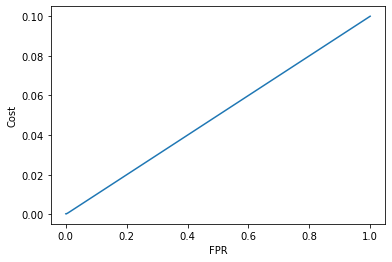

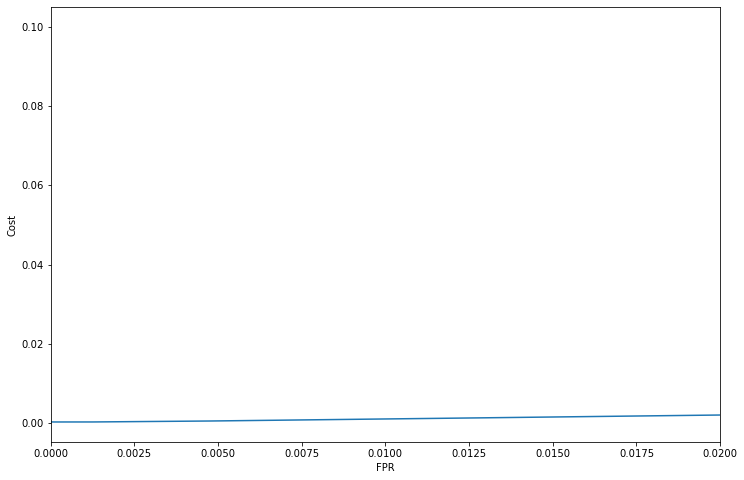

FPR at minimum cost: 0.0007787292661691379
0.00027759477708690344
344 2282712 1779 634
precision:  0.16203485633537448
recall:  0.35173824130879344
F-measure: 0.2218638716829319
MCC: 0.2382651325793138


In [8]:
#총 데이터 중 정상 데이터 비율
normal_n = 2855614
#총 데이터중 비정상 데이터 비율
abnormal_n = 978

p_plus = abnormal_n/(normal_n+abnormal_n)
p_minus = normal_n/(normal_n+abnormal_n)

print("p_plus: ", p_plus)
print("p_minus: ", p_minus)
w_FNR = 0.9
w_FPR = 0.1

cost = []
for i in range(len(fpr)):
  if i % 100 == 0:
    print(i)
  predicted = result >= thesholds[i]
  TP = np.sum(np.logical_and(new_label==1,  predicted==1))
  TN = np.sum(np.logical_and(new_label==0,  predicted==0))
  FP = np.sum(np.logical_and(new_label==0,  predicted==1))
  FN = np.sum(np.logical_and(new_label==1,  predicted==0))
  FNR = FN/(FN+TP) #비정상 데이터중 미알람 비율
  FPR = FP/(FP+TN) #정상 데이터중 비정상 알람 비율
  
  cost.append(w_FNR*FNR*p_plus + w_FPR*FPR*p_minus)


plt.plot(fpr, cost)
plt.xlabel("FPR")
plt.ylabel("Cost")
plt.show()

plt.figure(figsize=[12, 8])
plt.plot(fpr, cost)
plt.xlabel("FPR")
plt.ylabel("Cost")
plt.xlim([0, 0.02])
#plt.ylim([0, cost[400]])
plt.show()

print("FPR at minimum cost:", fpr[np.argmin(cost)])
print(np.amin(cost))

i = np.argmin(cost)
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)


print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall+1e-7))
print("MCC:", (TP*TN-FP*FN)/(np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)*1.0))+1e-7)